In [1]:
## Till now(4 lectures) : 28 mins

In [2]:
## next update(10 lectures) , it would be around : 1 hr 40 mins - 1 hr 50 mins

In [3]:
'''

Password - 1000k unique values for password collected online

Strength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong.
Strength of the password based on rules(such as containing digits, special symbols , etc.)


The passwords used in our analysis are from 000webhost leak that is available online

'''

'\n\nPassword - 1000k unique values for password collected online\n\nStrength - three values(0 , 1 , 2) i.e. 0 for weak, 1 for medium, 2 for strong.\nStrength of the password based on rules(such as containing digits, special symbols , etc.)\n\n\nThe passwords used in our analysis are from 000webhost leak that is available online\n\n'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### kindly checkout this -->> https://www.kaggle.com/krypticmouse/feature-engineering-eda-tutorial
### https://www.kaggle.com/dataswamy1/password-strength-checker

## 1: How to read data from SQL Database :
    Reading db file : 

In [5]:
## define connection for sqlite..
## Use the sqlite3 module to interact with a SQL database.. 


In [6]:
## u have your data into 'password.sqlite' having table has 'Users' 
## now u can read data from this db file 'password.sqlite' 
## using sqlite3 & pandas


#If we want to load huge amount of data into batches,
## we can use chunksize parameter,by default it is None


In [2]:
import sqlite3

In [3]:
# very first u have to create a SQL connection to our SQLite database
con = sqlite3.connect(r'G:\NLP\Projects\Password strength classifier/
                      password_data.sqlite')

In [9]:
#### check online its table name on https://sqliteonline.com/

In [4]:
pd.read_sql_query("SELECT * FROM Users", con).head(2)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1


In [5]:
pd.read_sql_query("SELECT * FROM Users LIMIT 2", con)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1


In [6]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [7]:
data.head(2)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1


In [8]:
data.shape

(100000, 3)

In [9]:
data.drop(['index'] , axis=1 ,inplace=True)

In [10]:
data.head(2)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1


In [11]:
data.columns

Index(['password', 'strength'], dtype='object')

In [12]:
data['strength'].unique()

array([1, 2, 0], dtype=int64)

### check all the missing values 

In [13]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [14]:
data.duplicated().sum()

0

In [15]:
## it means 0 feature have NAN values
data.isnull().any().sum()

0

In [16]:
data.isna().sum()

password    0
strength    0
dtype: int64

## 2: lets perform Semantic Analysis
    e.g ,,      
          
          1) How many password textual actually holds only numeric characters ?
          2) How many password textual actually holds only Upper-case character ? 
          3) How many password textual actually holds alpha-numeric character ? 
          4) How many password textual actually holds title-case character ? 
          5) How many password textual actually holds some special special character ? 
          
          

### a) How many password textual actually holds only numeric characters ? 

In [17]:
data['password'][0]

'zxe870819'

In [18]:
type(data['password'][0])

str

In [ ]:
### ie we have to use those functions which works on "string" data
## to return that string contain only numerical data or not ..

In [19]:
data['password'].str.isnumeric()

## Check whether all characters in each string are numeric.

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [20]:
data[data['password'].str.isnumeric()]

### only 26 people have set their password as only number !

,password,strength
12280,943801,0
14992,12345,0
20958,147856,0
21671,140290,0
23269,123987,0
28569,1233214,0
31329,0159456,0
32574,363761,0
37855,4524344,0
43648,5521597,0


In [24]:
data[data['password'].str.isnumeric()].shape

(26, 2)

In [29]:
## data[data['password'].str.isdigit()].shape

(26, 2)

### b) How many password textual actually holds only Upper-case character ? 

In [25]:
data['password'].str.isupper()

### Check whether all characters are uppercase.

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [26]:
data[data['password'].str.isupper()]

### around 1500 users have their passowrd as only capital letters !

,password,strength
115,EYT63119,1
273,INSPIRON6,1
338,1A2S3D4F,1
367,13269123A,1
373,YAMAZAKI82,1
...,...,...
99590,V13000993J,1
99692,65925013ABC,1
99784,01EDD055,1
99893,1UPONYOU,1


### c) How many password textual actually holds alpha-numeric character ? 

In [27]:
data[data['password'].str.isalnum()]

### most of the users around 650K have their passowrd as alpha-numeric..

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
4,c443balg,1
5,16623670p,1
...,...,...
99995,obejofi215,1
99996,fmiopvxb64,1
99997,czvrbun38,1
99998,mymyxe430,1


In [28]:
data[data['password'].str.isalpha()]

### only 50 users have their passowrd having alphabet only !

,password,strength
267,PomarancaÇ,1
1380,smgodt,0
3198,cuado,0
4560,jelsz,0
6380,demsxp,0
7803,secret,0
9218,caballo,0
11555,mhe,0
11667,kreedo,0
13645,nõmlich,0


In [29]:
data[data['password'].str.isalpha()].shape

(50, 2)

### d) How many password textual actually holds title-case character ? 

In [30]:
data[data['password'].str.istitle()]

### around 932 users have their passowrd having first alphabet capital !

,password,strength
64,Hisanthoshjasika0,2
242,Therockrockbottom72,2
338,1A2S3D4F,1
367,13269123A,1
526,Csicskarozsika1,2
...,...,...
99168,1053815198M,1
99192,Alfranx05122023,2
99375,Kensington1956,2
99590,V13000993J,1


### e) How many password textual actually holds some special special character ?

In [21]:
data['password']

0                      zxe870819
1                   xw46454nr23l
2                      soporte13
3        accounts6000webhost.com
4                       c443balg
                  ...           
99995                 obejofi215
99996                 fmiopvxb64
99997                  czvrbun38
99998                  mymyxe430
99999                glqjhkxb467
Name: password, Length: 100000, dtype: object

In [30]:
import string

In [31]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else :
            pass
        

In [47]:
find_semantics(data['password'][3])

1

In [48]:
data['password'].apply(find_semantics)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [49]:
data[data['password'].apply(find_semantics)==1]

## ie , 2663 observations have special characters in between them ..

,password,strength
3,accounts6000webhost.com,2
68,12463773800+,1
98,p.r.c.d.g.,1
145,cita-cita,1
180,karolina.susnina0U,2
...,...,...
99748,maiselis.com,1
99845,hosting4meze!@#,2
99954,semista_bakung15,2
99980,halflife2010!LEB,2


In [50]:
len(data[data['password'].apply(find_semantics)==1])/len(data)*100

### 2.6% people password actually uses special character in their password ..

2.6630000000000003

In [34]:
'''

punc_rows = []

for index,row in enumerate(data['password']):
    for char in row :
        if char in string.punctuation:
            punc_rows.append(index)





len(punc_rows)




len(set(punc_rows)) ## ie 2663 observations have special characters in between them ..


data.iloc[list(set(punc_rows)) , :]

data.iloc[list(set(punc_rows)) , :].shape

2663/data.shape[0]*100  ## to get data in %

'''

In [40]:
'''

        
# or

def find_semantics(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else :
            continue




find_semantics(data['password'][0])
data['password'].apply(find_semantics)

data[data['password'].apply(find_semantics)==1]
## ie , 2663 observations have special characters in between them ..



len(data[data['password'].apply(find_semantics)==1])/data.shape[0]*100
### 2.6% people password actually uses special character in their password ..


'''

"\n\n\ndef find_semantics(row):\n    for char in row:\n        if char in string.punctuation:\n            return 1\n        else :\n            continue\n        \n        \n        \n# or\n\ndef find_semantics(row):\n    for char in row:\n        if char in string.punctuation:\n            return 1\n        else :\n            pass\n\n\n\n\nfind_semantics(data['password'][0])\ndata['password'].apply(find_semantics)\n\ndata[data['password'].apply(find_semantics)==1]\n## ie , 17893 observations have special characters in between them ..\n\n\n\nlen(data[data['password'].apply(find_semantics)==1])/data.shape[0]*100\n### 2.6% people password actually uses special character in their password ..\n\n\n"

## 3: Feature Engineering :


In [41]:
'''

we have password strength so you can do a quick google search to check 
what features password depends on:-
It depends on 5 factors :

    Length of password
    Frequency of Lowercase Characters
    Frequency of Uppercase Characters
    Frequency of Numeric Characters
    Frequency of Special Characters

These will be the result of the google search to find factors 
effecting strength of password..


'''

'\n\nwe have password strength so you can do a quick google search to check what features password depends on:-\nIt depends on 5 factors :\n\n    Length of password\n    Frequency of Lowercase Characters\n    Frequency of Uppercase Characters\n    Frequency of Numeric Characters\n    Frequency of Special Characters\n\nThese will be the result of the google search to find factors effecting strength of password..\n\n\n'

#### length of Password : 

In [51]:

data['length'] = data['password'].str.len()
## df['length'] = [len(i) for i in df['password']]

#### Frequency of Lowercase Characters : 

In [43]:
[char for char in 'Shan12' if char.islower()]

['h', 'a', 'n']

In [44]:
len([char for char in 'Shan12' if char.islower()]) 

## return total lowercase chars in a word ..

3

In [52]:
def calc_total_lowercase_chars(row):
    lower_chars = []
    for char in row:
        if char.islower():
            lower_chars.append(char)
    return len(lower_chars)

In [46]:
data['password'].apply(calc_total_lowercase_chars)

0         3
1         5
2         7
3        18
4         5
         ..
99995     7
99996     8
99997     7
99998     6
99999     8
Name: password, Length: 100000, dtype: int64

In [53]:
data['lower_freq'] = np.round(data['password'].apply(\
                 calc_total_lowercase_chars)/data['length'],3)

# df['lower_freq'] = [len([char for char in row_data if char.islower()]) / len(row_data) for row_data in data['password']]

In [48]:
'''

Q..->> U might ask , why we are diving each value by its 
        Total length or why we are normalizing results ..

Ans : Just  to get rid of some outliers bcz some passwords have 
    huge length as we have seen , hence value of lowercase could 
    also be high , so lets normalise it in the range between 0 to 1


'''

'\n\nQ..->> U might ask , why we are diving each value by its Total length or why we are normalizing results ..\n\nAns : Just  to get rid of some outliers bcz some passwords have huge length as we have seen , hence value of lowercase could \nalso be high , so lets normalise it in the range between 0 to 1\n\n\n'

#### Frequency of Uppercase Characters : 

In [54]:
## ratio of Upper-case character in password

def calc_total_uppercase_chars(row):
    upper_chars = []
    for char in row:
        if char.isupper():
            upper_chars.append(char)
    return len(upper_chars)

In [55]:
data['upper_freq'] = np.round(data['password'].apply(\
                     calc_total_uppercase_chars)/data['length'],3)

# df['upper_freq'] = [len([char for char in row_data if char.isupper()]) / len(row_data) for row_data in data['password']]

#### Frequency of Numeric Characters : 

In [56]:

def calc_total_numerical_chars(row):
    num_chars = []
    for char in row:
        if char.isdigit():
            num_chars.append(char)
    return len(num_chars)

In [52]:
'''

def len_numerics(row):
    count=0
    for char in row:
        if char.isdigit():
            count=count+1
        else:
            pass
    return count


'''

'\n\ndef len_numerics(row):\n    count=0\n    for char in row:\n        if char.isdigit():\n            count=count+1\n        else:\n            pass\n    return count\n\n\n'

In [57]:
data['digit_freq'] = np.round(data['password'].apply(calc_total_numerical_chars)/data['length'],3)

# df['digit_freq'] = [len([char for char in row_data if char.isdigit()]) / len(row_data) for row_data in data['password']]

#### Frequency of special Characters : 

In [58]:

def calc_total_special_chars(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [59]:
data['special_char_freq'] = np.round(data['password'].apply(\
                            calc_total_special_chars)/data['length'],3)

# df['digit_freq'] = [len([char for char in row_data if not char.isalpha() and not char.isdigit()]) / len(row_data) for row_data in data['password']]

In [60]:
data['password'][68]

'12463773800+'

In [61]:
data.head(6)

,password,strength,length,lower_freq,upper_freq,digit_freq,special_char_freq
0,zxe870819,1,9,0.333,0.0,0.667,0.000
1,xw46454nr23l,1,12,0.417,0.0,0.583,0.000
2,soporte13,1,9,0.778,0.0,0.222,0.000
3,accounts6000webhost.com,2,23,0.783,0.0,0.174,0.043
4,c443balg,1,8,0.625,0.0,0.375,0.000
5,16623670p,1,9,0.111,0.0,0.889,0.000


## Some more Feature Engineering : 

In [57]:
'''


If you search a bit more into the factors affecting you'll find 2 feature that affect the strength of password are:-

Consecutive Sequence i.e. abc, 123 etc.
Identical Sequences i.e. aaaa, bbb, etc.
Let's create a column that tells if there is a identical sequence or not..



'''

"\n\n\nIf you search a bit more into the factors affecting you'll find 2 feature that affect the strength of password are:-\n\nConsecutive Sequence i.e. abc, 123 etc.\nIdentical Sequences i.e. aaaa, bbb, etc.\nLet's create a column that tells if there is a identical sequence or not..\n\n\n\n"

In [58]:
'''


\d-for digit(0-9)
\D-except digit
.-any char except new line
\w-word char(a-z,A-Z,digit(0-9) ,underscore)
\W-except \w
\s-space,tab,newline
\S-except space,tab,newline
\b-word boundary (means must have space before the word)
\B-not a word boundary
^-beginning of a string
$-end of a string


[-.] means either a dot or a dash 
#display either lowercase or uppercase =(r'[a-zA-Z]')




#use of quantifiers
*- 0 or more
+- 1 or more
?-0 or 1
{3}-exact 3
{3,4}-range{min,max} 
   {1,5} it will declare digit between 1,5 like 424,444,545 etc.    
   
|-or 


'''

"\n\n\n\\d-for digit(0-9)\n\\D-except digit\n.-any char except new line\n\\w-word char(a-z,A-Z,digit(0-9) ,underscore)\n\\W-except \\w\n\\s-space,tab,newline\n\\S-except space,tab,newline\n\x08-word boundary (means must have space before the word)\n\\B-not a word boundary\n^-beginning of a string\n$-end of a string\n\n\n[-.] means either a dot or a dash \n#display either lowercase or uppercase =(r'[a-zA-Z]')\n\n\n\n\n#use of quantifiers\n*- 0 or more\n+- 1 or more\n?-0 or 1\n{3}-exact 3\n{3,4}-range{min,max} \n   {1,5} it will declare digit between 1,5 like 424,444,545 etc.    \n   \n|-or \n\n\n"

In [59]:
import re

## 4: Performing Descriptive Statistics

In [60]:
data.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [61]:

cols = ['length', 'lower_freq', 'upper_freq',
       'digit_freq', 'special_char_freq']


for col in cols:
    print(col)
    
    print(data[[col,'strength']].groupby(['strength'] ).agg(\
                        ['max', 'min', 'mean', 'median' ]))
    
    print('\n')

length
         length                      
            max min       mean median
strength                             
0             7   1   6.550947      7
1            13   8   9.611074      9
2           220  14  15.953421     16


lower_freq
         lower_freq                      
                max  min      mean median
strength                                 
0             1.000  0.0  0.708050  0.714
1             0.923  0.0  0.630067  0.667
2             0.917  0.0  0.424679  0.400


upper_freq
         upper_freq                      
                max  min      mean median
strength                                 
0             1.000  0.0  0.012872  0.000
1             0.923  0.0  0.007915  0.000
2             0.889  0.0  0.367633  0.429


digit_freq
         digit_freq                      
                max  min      mean median
strength                                 
0             1.000  0.0  0.275383  0.286
1             0.923  0.0  0.360123  0.333
2           

In [62]:
'''

Just taking a rough look at the above stats I can say the following:-



->> Higher the length, Higher the strength

->> In case on alphabet frequency higher is not better. 
    Probably because it'll not be a strong password if max 
                   portion is occupied by just alphabets..
                   
    Password has more strength if the char types are spread 
    in decent proportions.



'''

"\n\nJust taking a rough look at the above stats I can say the following:-\n\n\n\n->> Higher the length, Higher the strength\n\n->> In case on alphabet frequency higher is not better. \n    Probably because it'll not be a strong password if max portion is occupied by just alphabets..\n    Password has more strength if the char types are spread in decent proportions.\n\n\n\n"

In [63]:
#### Similarly , if u need viz representation of above output : 
### (u can refer boxplot)
## bcz boxplot basically gives us 5-point summary of data !

In [64]:
import matplotlib.pyplot as plt

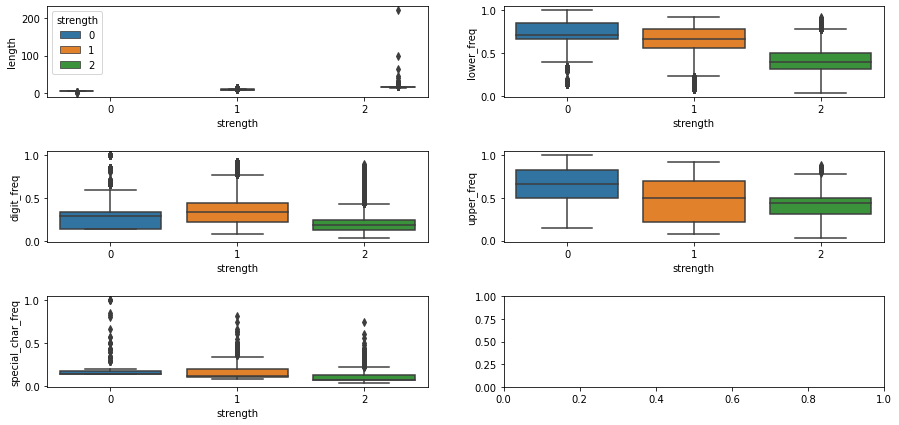

In [65]:
fig, ((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,
                    figsize=(15,7))


sns.boxplot(x='strength', y = 'length', data = data[data['length']>0],\
            ax=ax1 , hue='strength')

sns.boxplot(x='strength', y = 'lower_freq', \
            data = data[data['lower_freq']>0],ax=ax2)

sns.boxplot(x='strength', y = 'digit_freq', \
            data = data[data['digit_freq']>0],ax=ax3)

sns.boxplot(x='strength', y = 'upper_freq', \
            data = data[data['upper_freq']>0],ax=ax4)

sns.boxplot(x='strength', y = 'special_char_freq', \
            data = data[data['special_char_freq']>0],ax=ax5)

plt.subplots_adjust(hspace=0.6)

In [66]:
'''


Although I don't have much favorites when it comes plots, whatever gets the job done is fine, 
but if I had one Boxplot would be it. 
I mean the amount of information that single plot conveys is mind blowing. 
You get info about outliers, quartiles, median well technically 2nd quartile is median but you get the gist. 
Now these stuff can bee seen without boxplot but by visualizing them you can clearly check out the trend 
and splits if any and better interpret. Plotting is a part of pipeline but it's not the pipeline itself.


'''

"\n\n\nAlthough I don't have much favorites when it comes plots, whatever gets the job done is fine, \nbut if I had one Boxplot would be it. \nI mean the amount of information that single plot conveys is mind blowing. \nYou get info about outliers, quartiles, median well technically 2nd quartile is median but you get the gist. \nNow these stuff can bee seen without boxplot but by visualizing them you can clearly check out the trend \nand splits if any and better interpret. Plotting is a part of pipeline but it's not the pipeline itself.\n\n\n"

In [67]:
'''
Insights :
Regarding the insights we can say that:-

->> We can say that strength can be solely determined based on length since it gives a perfect split. 
    That would be the best feature then but logically that doesn't sound correct 
    because when I ran 2 password of same length 
    over checker they gave 2 different level. 

    Now I understand the logic they use is different and for this data length is the best but of larger scale things might be iffy.
    But yes longer passwords have more strength 
    so given the circumstance we might even just use length based classification or use it as primary feature.





->> Higher Lowercase frequency is seen in low strength passwords.. 
    For higher strength passwords ,  Lowercase frequency can be high too 
    but that is probably effect of length.


->> In digit_freq there is a split of majority poplutation of strength 1 and 2 
    but for 0 and 1 strength , there is overlap so no too much to say there. 
    But we can say a nicely propotioned password is good..
    
    
->> In upper_freq , there is a trend but not as strong as length or lower_freq..
    
    
->> Similar but stronger same trend as above in special_freq.

->> Higher strength passwords have more type breaks.


'''

"\nInsights :\nRegarding the insights we can say that:-\n\n->> We can say that strength can be solely determined based on length since it gives a perfect split. \n    That would be the best feature then but logically that doesn't sound correct because when I ran 2 password of same length \n    over checker they gave 2 different level. \n\n    Now I understand the logic they use is different and for this data length is the best but of larger scale things might be iffy.\n    But yes longer passwords have more strength \n    so given the circumstance we might even just use length based classification or use it as primary feature.\n\n\n\n\n\n->> Higher Lowercase frequency is seen in low strength passwords. \n    For higher strength passwords ,  Lowercase frequency can be high too but that is probably effect of length.\n\n\n->> In digit_freq there is a split of majority poplutation of strength 1 and 2 \n    but for 0 and 1 strength , there is overlap so no too much to say there. \n    But w

## 5: Feature Importance (How to figure out imp. feature)

In [68]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [69]:
def get_dist(data , feature):
    
    plt.figure(figsize=(10,8))
    
    plt.subplot(1,2,1)
    sns.violinplot(x='strength', y=feature ,\
                   data= data[data[feature]>0])
    
    plt.subplot(1,2,2)
    sns.distplot(data[data['strength']==0][feature],\
                 color='red', label='0', hist=False)
    
    sns.distplot(data[data['strength']==1][feature],\
                 color='blue', label='1' , hist=False)
    
    sns.distplot(data[data['strength']==2][feature],\
                 color='orange', label='2' , hist=False)
    
    plt.legend()
    plt.show()
    

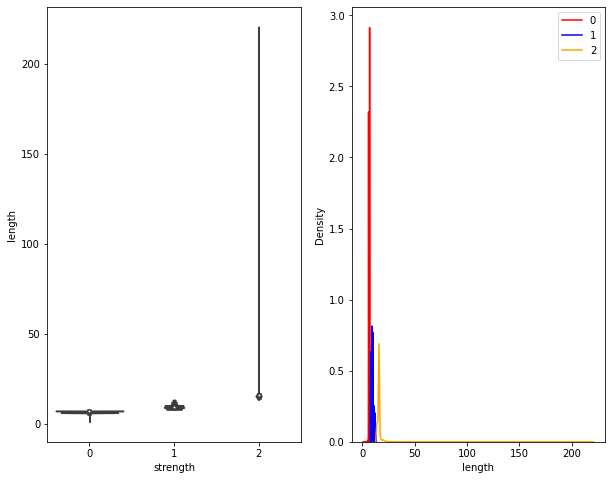

In [70]:
get_dist(data , 'length')

In [71]:
### we have few overlappping region in distribution plot 
### when class is 2 , we have higher value of 'length' 
## than class 1 & class 0

## it means 'length' is a interesting feature as we have very less overlapping region

## similarly from violinplot ,we will say on account of less overlappping , 
## this feature 'length' is amazing & useful in determining the strength


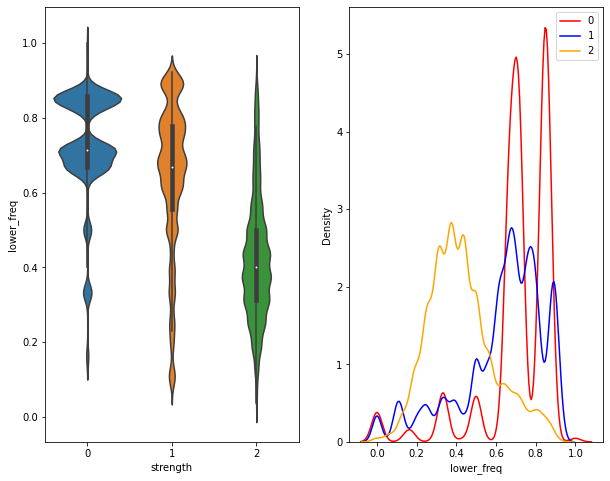

In [72]:
get_dist(data , 'lower_freq')

In [73]:
### we have some kind of overlappping region in distribution plot 
### when class is 2 , we have less value of 'lower_freq' than class 1 & class 0

## it means 'lower_freq' is a interesting feature upto some extent as have some overlapping region

## similarly from violinplot ,we will say on account of such overlappping , 
## when class is 2 we have less value of 'lower_freq' than class 1 & class 0
## this feature 'lower_freq' is a interesting feature upto some extent in determining the strength

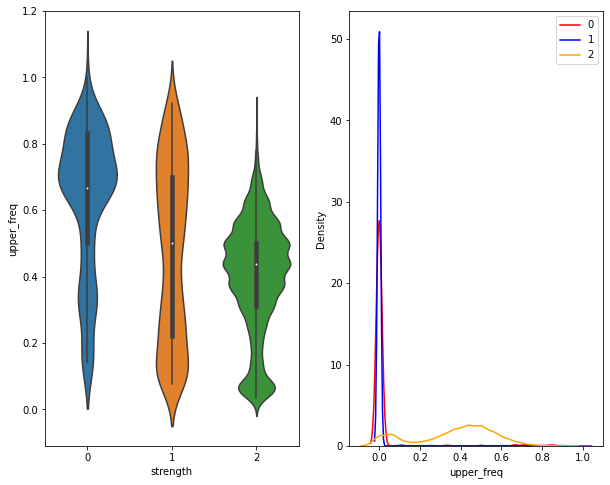

In [74]:
get_dist(data , 'upper_freq')

In [75]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

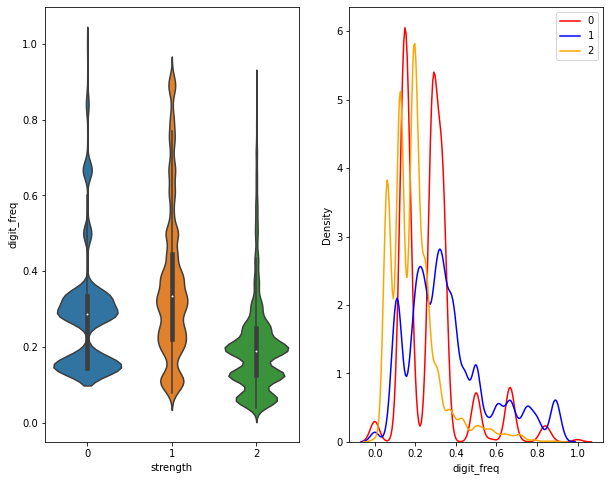

In [76]:
get_dist(data , 'digit_freq')

In [77]:
### we have quite high overlappping region in distribution plot 

## it means 'upper_freq' is not that much interesting feature as have some overlapping region

## similarly from violinplot ,we will say on account of such huge overlappping , 
## this feature 'lower_freq' is not a interesting feature in determining the strength

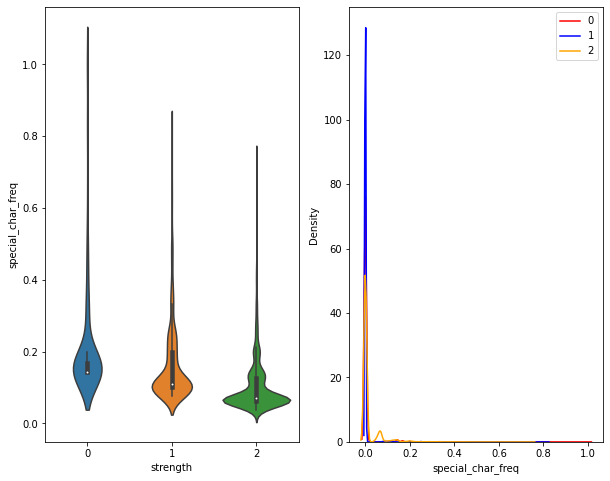

In [78]:
get_dist(data , 'special_char_freq')

In [79]:
## this gives us idea that lower count of special char are good for high strength ..

## 6: Apply TF_IDF on data

In [80]:
data.shape

(100000, 7)

In [81]:
data.columns

Index(['password', 'strength', 'length', 'lower_freq', 'upper_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [82]:
password_tuple = np.array(data)

In [83]:
password_tuple

array([['zxe870819', 1, 9, ..., 0.0, 0.667, 0.0],
       ['xw46454nr23l', 1, 12, ..., 0.0, 0.583, 0.0],
       ['soporte13', 1, 9, ..., 0.0, 0.222, 0.0],
       ...,
       ['czvrbun38', 1, 9, ..., 0.0, 0.222, 0.0],
       ['mymyxe430', 1, 9, ..., 0.0, 0.333, 0.0],
       ['glqjhkxb467', 1, 11, ..., 0.0, 0.273, 0.0]], dtype=object)

#### shuffling randomly for robustness

In [84]:
import random
random.shuffle(password_tuple)

In [85]:
password_tuple

array([['zxe870819', 1, 9, ..., 0.0, 0.667, 0.0],
       ['zxe870819', 1, 9, ..., 0.0, 0.667, 0.0],
       ['xw46454nr23l', 1, 12, ..., 0.0, 0.583, 0.0],
       ...,
       ['frmiugh27', 1, 9, ..., 0.0, 0.222, 0.0],
       ['gozila261', 1, 9, ..., 0.0, 0.333, 0.0],
       ['juanchi40', 1, 9, ..., 0.0, 0.222, 0.0]], dtype=object)

In [86]:
x = [row[0] for row in password_tuple]
y = [row[1] for row in password_tuple]


In [87]:
#### as password is a series of chars  , we have to calculate TF_IDF values of each char to compute which is most important char
#### Thats why we have to split our password as-->>
#### kzde5577-->> ['k', 'z', 'd', 'e', '5', '5', '7', '7']


### then we will compute Tf-Idf value of each character like Tf-IDF value of k
###                                                          Tf-IDF value of z


## ways to obtain kzde5577-->> ['k', 'z', 'd', 'e', '5', '5', '7', '7']

# either define your own function or use analyzer='char' in Tf-IDF class..

#### import TF-IDF vectorizer to convert text data into numerical data

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
'''

If u will directly apply TF_IDF on 'password' without converting each password into characters , 
u will get tf-idf matrix of shape (669639, 674459)


from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(lowercase=False)
matrix=tfidf.fit_transform(data['password'])
matrix.toarray()

len(tfidf.get_feature_names()) gives 674459

matrix.toarray() ->> gives memory error
matrix.toarray()[0] ->> gives memory error

'''

"\n\nIf u will directly apply TF_IDF on 'password' without converting each password into characters , \nu will get tf-idf matrix of shape (669639, 674459)\n\n\nfrom sklearn.feature_extraction.text import TfidfVectorizer\ntfidf=TfidfVectorizer(lowercase=False)\nmatrix=tfidf.fit_transform(data['password'])\nmatrix.toarray()\n\nlen(tfidf.get_feature_names()) gives 674459\n\nmatrix.toarray() ->> gives memory error\nmatrix.toarray()[0] ->> gives memory error\n\n"

In [90]:
### make sure data u are going to pass to fit_transform() , must be in the form of array or list

In [100]:
type(x)

list

In [92]:
type(np.array(x))

numpy.ndarray

In [93]:
### u can use either x or np.array(x)

In [94]:
vectorizer=TfidfVectorizer(analyzer='char')

## vectorizer = TfidfVectorizer(tokenizer = word_divide_char)

#### apply TF-IDF vectorizer on data

In [95]:
X = vectorizer.fit_transform(x)

## or using X=vectorizer.fit_transform(np.array(x))

In [96]:
X.shape

(100000, 87)

In [97]:
type(X)

scipy.sparse.csr.csr_matrix

In [98]:
data['password'].shape

## ie (100000,1) passwords gets represented using (100000, 82)
## ie each password gets represented using 82 dimensions ..

(100000,)

In [99]:
### to get entire matrix of TF-IDF for 100000 passwords ..
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [100]:
X.toarray().shape

(100000, 85)

In [108]:
### returns feature/char_of_passwords/columns names

vectorizer.get_feature_names_out()

## vectorizer.vocabulary_.keys()

## these are the various chars to which different TF-IDF values are assigned for 100000 passwords ..

array(['\x04', '\x0e', '\x11', ' ', '!', '#', '$', '%', '&', '(', ')',
       '*', '+', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_',
       '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
       'z', '{', '|', '}', '~', '¨', '°', '±', '³', '´', 'µ', 'ß', 'ä',
       'æ', 'ç', 'í', 'ñ', 'õ', 'ö', '÷', 'ú', 'ý', 'þ', '›'],
      dtype=object)

In [111]:
len(vectorizer.get_feature_names_out())

87

### Imagine ,Getting TF-IDF scores of Ist row

In [126]:
data['password'][0]

'zxe870819'

In [127]:
## TD-IDF values of 1st row (1st row password)
X.toarray()[0]

## equivalent to data['password'][0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.27281263, 0.20929714, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.31448989, 0.60808775,
       0.29133308, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.23509667, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.37920139, 0.        , 0.35938041, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### getting TF-IDF matrix of entire data

In [105]:
X

<100000x85 sparse matrix of type '<class 'numpy.float64'>'
	with 841339 stored elements in Compressed Sparse Row format>

In [106]:
columns = vectorizer.get_feature_names()

In [107]:
df2 = pd.DataFrame(X.toarray(), columns=columns)

In [108]:
df2

,,,,!,#,$,%,&,(,),...,æ,ç,é,í,õ,ö,÷,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
df2['length'] = data['length']
df2['lower_freq'] = data['lower_freq']


In [110]:
X_new = df2.to_numpy()

In [111]:
'''

While assigning , X_new = df2.to_numpy() , if we are getting Memory-error so kindly continue with sample of data : 


'''

'\n\nWhile assigning , X_new = df2.to_numpy() , if we are getting Memory-error so kindly continue with sample of data : \n\n\n'

In [112]:
X_new.shape

(100000, 87)

## 7: Applying Machine Learning algorithm on data  : 

#### split data into train & test
    train---> To learn the relationship within data, 
    test-->  To do predictions, and this testing data will be unseen to my model

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2)

In [115]:
X_train.shape

(80000, 87)

In [116]:
X_train

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  7.   ,  0.857],
       [ 0.   ,  0.   ,  0.   , ...,  0.   , 10.   ,  0.8  ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  9.   ,  0.333],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  8.   ,  0.75 ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  8.   ,  0.625],
       [ 0.   ,  0.   ,  0.   , ...,  0.   , 11.   ,  0.727]])

#### Apply Logistic on data as use-case is Classification

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
## Apply Multinomial logistic Regression as have data have 3 categories in outcomes

clf = LogisticRegression(random_state=0 , multi_class='multinomial')

In [119]:
clf.fit(X_train,y_train) ## takes 2 min

LogisticRegression(multi_class='multinomial', random_state=0)

#### doing prediction on X-Test data

In [120]:
X_test

array([[ 0.   ,  0.   ,  0.   , ...,  0.   , 11.   ,  0.818],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  8.   ,  0.75 ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  6.   ,  0.667],
       ...,
       [ 0.   ,  0.   ,  0.   , ...,  0.   , 12.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  6.   ,  0.667],
       [ 0.   ,  0.   ,  0.   , ...,  0.   , 10.   ,  0.8  ]])

In [121]:
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [122]:
from collections import Counter

In [123]:
Counter(y_pred)

Counter({1: 16910, 2: 1749, 0: 1341})

## 8: Doing password strength prediction on sample data 

In [124]:
### as Logistic reg. model'clf' was trained on 84 features [82 from TF-IDF + 2 features from (total_length+lower_case_freq)]
## hence we need to convert any input(password) into (1,84) so that my model will accept this as Input ..


In [125]:
sample = np.array(['%@123abcd'])

In [126]:
sample_matrix = vectorizer.transform(sample)

In [127]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71931562, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14385886, 0.16544568, 0.18460074, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48696177, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13802319, 0.23267933, 0.21616547, 0.20830414,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [128]:
sample_matrix.toarray().shape

### right now , array dim. is (1,82) ,now we need to make it (1,84) so that my model will accept it as input..

(1, 85)

In [129]:
### ie we need to add (length_of_password) & (total_lowercase_chars) in passsword

In [130]:
len('%@123abcd')

9

In [131]:
len([char for char in '%@123abcd' if char.islower()])

4

In [132]:
np.append(sample_matrix.toarray() ,(9,4))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.71931562, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14385886, 0.16544568, 0.18460074, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.48696177, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.13802319, 0.23267933, 0.21616547, 0.20830414,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [134]:
np.append(sample_matrix.toarray() ,(9,4)).reshape(1,87)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71931562, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14385886, 0.16544568, 0.18460074, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48696177, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.13802319, 0.23267933, 0.21616547, 0.20830414,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [135]:
new_matrix = np.append(sample_matrix.toarray() ,(9,4)).reshape(1,87)

In [136]:
clf.predict(new_matrix)

array([2])

In [ ]:
### lets Automate it (lets design a function)

In [137]:
def predict():
    password = input('Enter a password: ')
    sample = np.array([password])
    sample_matrix = vectorizer.transform(sample)
    
    length_pass = len(password)
    length_lowercase = len([char for char in password if char.islower()])
    new_matrix = np.append(sample_matrix.toarray() ,(length_pass,length_lowercase)).reshape(1,87)
    result = clf.predict(new_matrix)
    
    if result == 0:
        return 'password is weak'
    if result == 1:
        return 'password is normal'
    else:
        return 'password is strong'

In [138]:
predict()

Enter a password: 123nvfH@43vhnafeh


'password is strong'

In [139]:
predict()

Enter a password: hhafwd


'password is strong'

## 9: Model evaluation : 

#### check Accuracy of your model using confusion_matrix,accuracy_score

In [109]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [110]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[  681  2041     1]
 [  543 13919   254]
 [   65  1084  1412]]
0.8006


In [ ]:
'''

True positive (Predicted(1) & Actual(1)) : often known as 11
(ie actual is +ve[1] & u have predicted True[1])


True Negatives (Predicted 0 & Actual 0): often known as 00
(ie actual is -ve[0] & u have predicted True[0])


False Positives (Predicted 1 & Actual 0): often known as 10
(ie actual is -ve[0] & u have predicted False[1])


False Negatives (Predicted 0 & Actual 1): often known as 01
(ie actual is +ve[1] & u have predicted False[0])


'''

##### create report of your model

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.25      0.34      2723
           1       0.82      0.95      0.88     14716
           2       0.85      0.55      0.67      2561

    accuracy                           0.80     20000
   macro avg       0.73      0.58      0.63     20000
weighted avg       0.78      0.80      0.78     20000



In [ ]:
'''

explain precision , recall , f1-score , support 


'''

## 10 : Implement Various Machine Learning Algos : 

In [181]:
import sklearn.linear_model as sl
import sklearn.ensemble as se
import sklearn.tree as tr
import sklearn.neighbors as ne
import sklearn.svm as svm

In [182]:
### classifier models
models = []

models.append(('RandomForest', se.RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)))
models.append(('Decision Tree', tr.DecisionTreeClassifier()))
models.append(('KNN', ne.KNeighborsClassifier(n_neighbors = 5)))


In [183]:
for name, model in models:
    print(name)
    print(model)

RandomForest
RandomForestClassifier(min_samples_leaf=10, random_state=1)
Decision Tree
DecisionTreeClassifier()
KNN
KNeighborsClassifier()


In [185]:
for name, model in models:
    print(name)
    model = model.fit(X_train,y_train)
    
    ## Make predictions
    predictions = model.predict(X_test)

    ## confusion metrics of model
    from sklearn.metrics import confusion_matrix
    cm=confusion_matrix(y_test,predictions)
    print(cm)
    
    ## Classification report of model
    from sklearn.metrics import accuracy_score,classification_report
    print(accuracy_score(y_test,predictions))
    print(classification_report(y_test,predictions))
    print('\n')
    
    
    ## RF have taken 2 mins , DT have taken hardly 10 secs , KNN will take around 2 mins

RandomForest
RandomForest
[[ 1685  1038     0]
 [   80 14587    49]
 [   10   270  2281]]
0.92765
              precision    recall  f1-score   support

           0       0.95      0.62      0.75      2723
           1       0.92      0.99      0.95     14716
           2       0.98      0.89      0.93      2561

    accuracy                           0.93     20000
   macro avg       0.95      0.83      0.88     20000
weighted avg       0.93      0.93      0.92     20000



Decision Tree
Decision Tree
[[ 2406   286    31]
 [  239 14335   142]
 [   34   153  2374]]
0.95575
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2723
           1       0.97      0.97      0.97     14716
           2       0.93      0.93      0.93      2561

    accuracy                           0.96     20000
   macro avg       0.93      0.93      0.93     20000
weighted avg       0.96      0.96      0.96     20000



KNN
KNN
[[  479  2180    64]
 [  765